#  *The Upset of the Cigarette*
> **99th Percentile Posse:** Tommy Castino, Jeet Raol, Iqra Memon, Viet Nguyen

## Project Introduction

The question that our group attempted to find the answer for is "What is leading to the decline in cigarette use?". We knew that a decline is happening but we wanted to know why, that way this trend can continue. A couple of hypotheses that we had were that "The rise of e-cigarette use is much larger than the rate of cigarettes not being used" and "Young adults are using e-cigarettes more than those who quit smoking".

The data that we are using is about the use of cigarettes and other types of tobacco throughout the years for different age groups and other demographics. This data comes from the website for the Centers of Disease Control and Prevention (cdc.gov). The data set that we are using contains data about risk factors of tobacco use in the U.S. from 2011-2017; it contains 33,451 rows and has information about tobacco use in each state categorized by race, gender, age, education level, and type of combustible used by %.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

## Data Cleaning

In [2]:
tobacco_use = pd.read_csv('Behavioral_Risk_Factor_Data__Tobacco_Use__2011_to_present_.csv')

tobacco_use = tobacco_use[tobacco_use.Data_Value_Footnote_Symbol != '*']
#Removing rows from df which have a small sample size, denoted by '*' in the Data_Value_Footnote_Symbol column

tobacco_use = tobacco_use[tobacco_use.YEAR != '2011-2012']
tobacco_use = tobacco_use[tobacco_use.YEAR != '2012-2013']
tobacco_use = tobacco_use[tobacco_use.YEAR != '2013-2014']
tobacco_use = tobacco_use[tobacco_use.YEAR != '2014-2015']
tobacco_use = tobacco_use[tobacco_use.YEAR != '2015-2016']
tobacco_use = tobacco_use[tobacco_use.YEAR != '2016-2017']
tobacco_use = tobacco_use[tobacco_use.YEAR != 2011]

def drop_columns(tobacco_use): #Function to drop the columns that we do not need
    return tobacco_use.drop(columns = ['LocationDesc', 'TopicType', 'Data_Value_Type', 'Data_Value_Std_Err', 
                                    'Low_Confidence_Limit', 'High_Confidence_Limit', 'GeoLocation', 'TopicId',
                                    'MeasureId', 'StratificationID1', 'StratificationID2', 'StratificationID3',
                                    'StratificationID4', 'SubMeasureID', 'DisplayOrder', 'DataSource',
                                      'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'TopicTypeId'])

tu_df = (tobacco_use.pipe(drop_columns)) #Calling function to drop unneeded columns from df

tu_df.head(10) #Display first 10 elements of the dataframe

C:\Users\Iqra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,LocationAbbr,TopicDesc,MeasureDesc,Response,Data_Value_Unit,Data_Value,Sample_Size,Gender,Race,Age,Education
0,2017,US,Smokeless Tobacco Use (Adults),User Status,Current,%,4.0,NaN,Overall,All Races,All Ages,All Grades
1,2017,US,Smokeless Tobacco Use (Adults),User Status,Not Current,%,96.0,NaN,Overall,All Races,All Ages,All Grades
2,2012,US,Cigarette Use (Adults),Smoking Status,Former,%,25.2,NaN,Overall,All Races,All Ages,All Grades
3,2012,US,Cigarette Use (Adults),Smoking Status,Never,%,54.4,NaN,Overall,All Races,All Ages,All Grades
4,2012,US,Smokeless Tobacco Use (Adults),Current Use,NaN,%,4.1,NaN,Overall,All Races,All Ages,All Grades
5,2012,US,Smokeless Tobacco Use (Adults),User Status,Current,%,4.1,NaN,Overall,All Races,All Ages,All Grades
6,2012,US,Smokeless Tobacco Use (Adults),User Status,Not Current,%,95.9,NaN,Overall,All Races,All Ages,All Grades
15,2016,US,Cessation (Adults),Percent of Former Smokers Among Ever Smokers,NaN,%,60.2,NaN,Overall,All Races,All Ages,All Grades
105,2017,AL,Cigarette Use (Adults),Smoking Status,Current,%,23.4,2598.0,Male,All Races,All Ages,All Grades
158,2016,US,Cessation (Adults),Quit Attempt in Past Year Among Every Day Ciga...,NaN,%,50.9,NaN,Overall,All Races,All Ages,All Grades


## Visualizations

Text(0, 0.5, 'Percentage of Current Users')

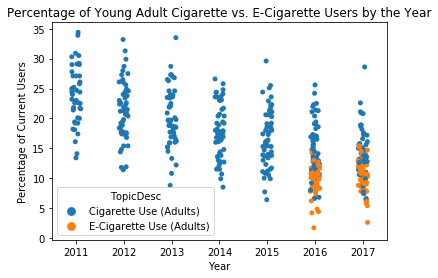

In [3]:
sp_df = tobacco_use
sp_df = sp_df[sp_df.Gender == 'Overall']
sp_df = sp_df[sp_df.Race == 'All Races']
sp_df = sp_df[sp_df.Age == '18 to 24 Years']
sp_df = sp_df[sp_df.Education == 'All Grades']
sp_df = sp_df[sp_df.TopicDesc != 'Smokeless Tobacco Use (Adults)']
sp_df = sp_df[sp_df.TopicDesc != 'Cessation (Adults)']
sp_df.sort_values(by=['YEAR'])

sp = sns.stripplot(x="YEAR", y="Data_Value", hue="TopicDesc", data=sp_df, jitter=True)
sp.set_title('Percentage of Young Adult Cigarette vs. E-Cigarette Users by the Year')
sp.set_xlabel('Year')
sp.set_ylabel('Percentage of Current Users')

C:\Users\Iqra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Percentage of Current Users')

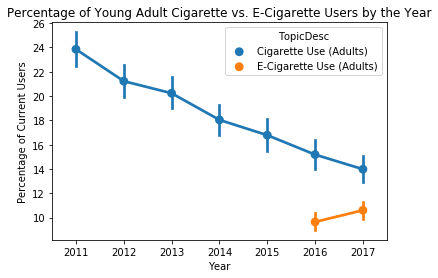

In [4]:
pp = sns.pointplot(x="YEAR", y="Data_Value", hue="TopicDesc", data=sp_df)
pp.set_title('Percentage of Young Adult Cigarette vs. E-Cigarette Users by the Year')
pp.set_xlabel('Year')
pp.set_ylabel('Percentage of Current Users')

In the plots above we can see the percentage of cigarette and e-cigarette users as a dot for each state. Unfortunately the data collection for e-cigarette use only begins in 2016 so we can only compare that to 2017. In the strip plot above we cannot really tell what the difference is between e-cigarette use so a similar point plot was made below it. In both plots we can easily see the trend in cigarette use decline and not surprisingly e-cigarette use increases quite a bit just in between those two years. This could be largely due to young adults switching from cigarettes to e-cigarettes, but we believe that since the increase for e-cigarette use is slightly steeper than the decline for cigarette use, then young adults are starting off vaping more than those that start to smoke or switch to vapes. This could mean that they are the target audience for e-cigarette companies and this will most likely cause the trends in the above visualizations to continue.

Text(0.5, 0, 'Percent of Cigarette Smokers')

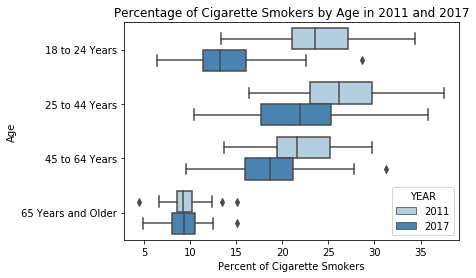

In [17]:
box_df = tobacco_use[tobacco_use.LocationAbbr != 'US']
box_df = box_df[box_df.MeasureDesc == 'Current Smoking']
box_df = box_df[box_df.TopicDesc == 'Cigarette Use (Adults)']
box_df = box_df[box_df.Race == 'All Races']
box_df = box_df[box_df.Education == 'All Grades']
box_df = box_df[box_df.Gender == 'Overall']
box_df = box_df[box_df.Age != 'All Ages']
box_df = box_df[box_df.Age != '18 to 44 Years']
box_df = box_df[box_df.Age != 'Age 20 and Older']
box_df = box_df[box_df.Age != 'Age 25 and Older']
box_df = box_df[box_df.YEAR != '2012']
box_df = box_df[box_df.YEAR != '2013']
box_df = box_df[box_df.YEAR != '2014']
box_df = box_df[box_df.YEAR != '2015']
box_df = box_df[box_df.YEAR != '2016']

box = sns.boxplot(x='Data_Value', y='Age', hue='YEAR', data=box_df, palette='Blues')

box.set_title('Percentage of Cigarette Smokers by Age in 2011 and 2017')
box.set_xlabel('Percent of Cigarette Smokers')

In the box plot above, we are comparing cigarette smoking percentages between different ages of people to see how they have changed from 2011 to 2017. The percent of smokers has clearly decreased very significantly for young adults but not so much for those who are 65 years and older. This finding from the visualization makes us think once again that maybe not only are younger generations not starting to smoke as many cigarettes as before, but also that they might be being influenced the most by advertisers of e-cigarettes compared to all of the older age groups.

Text(0, 0.5, 'Percentage of Cigarette Smokers')

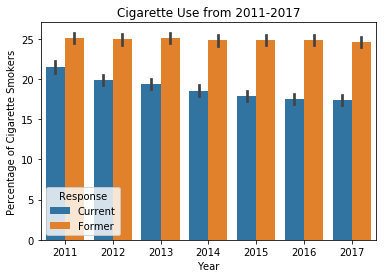

In [18]:
bar_df = tobacco_use[tobacco_use.LocationAbbr != 'US']
bar_df = bar_df[bar_df.Response != 'Never']
bar_df = bar_df[bar_df.Response != 'Every Day']
bar_df = bar_df[bar_df.Response != 'Some Days']
box_df = box_df[box_df.Race == 'All Races']
box_df = box_df[box_df.Education == 'All Grades']
box_df = box_df[box_df.Gender == 'Overall']
box_df = box_df[box_df.Age != 'All Ages']
bar_df = bar_df[bar_df.TopicDesc == 'Cigarette Use (Adults)']
bar_df.sort_values(by=['YEAR'])

bars = sns.barplot(x='YEAR', y='Data_Value', hue='Response', data=bar_df)

bars.set_title('Cigarette Use from 2011-2017')
bars.set_xlabel('Year')
bars.set_ylabel('Percentage of Cigarette Smokers')

In the above visualization we can once again confirm the fact that cigarette smoking has been declining, and not only that, but the number of former smokers is remaining consistent. Due to this, an inference can be made that either older smokers are passing away while people quit smoking, or younger people are not starting to smoke as much as previous generations did. A combination of the two possibilities that were just mentioned seems to be the most likely conclusion from this multibar graph.

## ML Analyses

## Link to Notebook on GitHub
https://github.com/edgeslab/cs418-project-99th-percentile-posse/blob/master/FinalProject.ipynb